In [ ]:
# ECE471/571 project 3
# Ken Boling
# Python 3.6.2
# Pycharm Development Environment
# Juypter Notebook

# Data management tools:
import pandas as pd
import numpy as np
from PIL import Image as pil

# Plotting tools:
from matplotlib import pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
#from Project_3_Functions import rgb_colorspace_3d

# other tools:
import os
import time
from sklearn.cluster import KMeans


# Juypter Notebook tools:
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
InteractiveShell.ast_node_interactivity = "all"

# Select output directory for figures etc.
working_directory = 'C:\\Users\\Ken\\Google Drive\\UTK Class work\\Pattern Classification\\Project 3'

flowersm_original_image = pil.open(fp=(os.path.join(working_directory, 'flowersm.ppm')))     


flowersm_original_image = pil.open(fp=(os.path.join(working_directory, 'flowersm.ppm')), mode='r')     


print(flowersm_original_image.format, flowersm_original_image.size, flowersm_original_image.mode)
#r,g,b = pil.split(flowersm_original_image)
#convert image to a 3d array
flowersm_original_3d_array = np.array(flowersm_original_image)


print(flowersm_original_3d_array.shape)

#find the total number of unique color in the original image:
#reshap
flowersm_2d_rgb_array= flowersm_original_3d_array.reshape(-1,3)

print(flowersm_2d_rgb_array.shape)

nX, count = np.unique(flowersm_original_3d_array.reshape(-1,3),axis=0,return_counts=True)
print(nX.shape)

# The image is now a 120, 120, 3 arrays )




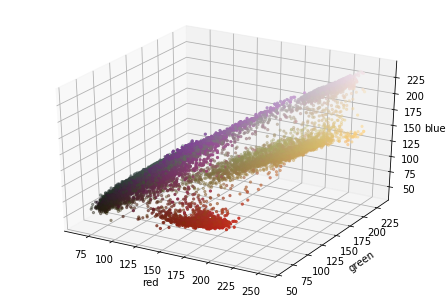

In [5]:

#rgb 3dimetionl plot


def rgb_colorspace_3d(rgb_3d_array, title):
    fig = plt.figure()
    ax = Axes3D(fig)
    pixel_colors = rgb_3d_array.reshape((np.shape(rgb_3d_array)[0] * np.shape(rgb_3d_array)[1], 3))
    norm = colors.Normalize(vmin=-1., vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()

    ax.scatter(xs=rgb_3d_array[:, :, 0],
               ys=rgb_3d_array[:, :, 1],
               zs=rgb_3d_array[:, :, 2],
               facecolors=pixel_colors,
               marker=".")
    fig.title = title

    ax.set_xlabel('red')
    ax.set_ylabel('green')
    ax.set_zlabel('blue')

    fig.savefig((os.path.join(working_directory, title) + '.png'), dpi=1200)
    plt.show()

rgb_colorspace_3d(rgb_3d_array=flowersm_original_3d_array ,title='RGB color space for original flowersm') 




In [19]:
from scipy.spatial import distance
from sklearn.cluster import KMeans
from skimage import io
import matplotlib.image as image



def kens_k_means_image_test(X, k, d, output_path):
    
    start = time.time() #timer
    
    #generate centroids
    centroids = np.random.randint(
        low=np.amin(X),
        high=np.amax(X),
        size=(k,d))
    
    
    print(centroids.shape)
    # I need to input a 2d array of each pixel rgb values:
    X_2d = (X).reshape(-1,3)
    
    while True:
        # Assign labels based on closest center, numpy array broadcasting rules apply
        #labels = np.amin(np.linalg.norm(X_2d - centroids[:, np.newaxis]))
        
        labels = np.sqrt(((X_2d - centroids[:, np.newaxis])**2).sum(axis=2))
        
        # Find new centers from means of points
        new_centers = np.array([X_2d[labels == i].mean(axis=0)
                                for i in range(centroids.shape[0])])
       
        # Check for convergence
        if np.all(centroids == new_centers):
            break
    centers = new_centers
        
    X_kmeans=X_2d[centers]
    #turn the 2d array into the 3d array that defined the image
    #X_3d_kmeans = np.reshape(X_2d_kmeans, (X.shape))
    
    # remember to keep track of data types..... 
    output_array = np.asarray((X_kmeans), dtype=np.uint8)

    output_image = pil.fromarray(output_array)
    #output_image.show()
    output_image.save(fp=output_path)
    end = time.time()
    print ('time to complete:', end - start, 'seconds')
    return output_array


def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [43]:
from scipy.spatial import distance
from sklearn.cluster import KMeans
from skimage import io
import matplotlib.image as image



def kens_k_means_image_test_2(X, k, d, output_path, max_iterations):
    
    start = time.time() # timer
    
    # I need to input a 2d array of each pixel rgb values:
    X_2d = X.reshape(-1,d)
    X_2d_randomized = np.random.permutation(X_2d)
    #generate centroids by generating random numbers within the range of the input array
    #centroids = np.array(np.random.randint(low=0,high=255,size=(k,d)), dtype=np.uint8)
   
    # Another initialization method
    
    #data_max = 
    #data_min = np.min(X_2d, axis=0)
    #nrange = np.random.uniform(low=0., high=1., size=(k, d))
    #centroids = nrange * (data_max - data_min) + data_min
    
    
    #generate centroids by using random points that are parts of the input array
    #indices = np.random.choice(X_2d.shape[0], size=k, replace=False)
    #centroids = X_2d[indices]
    #unique_values = np.unique(X_2d)
    #centroids = unique_values[np.random.choice(X_2d.shape[0], k, replace=False)]
    
    
    centroids = X_2d_randomized[:k]

    #print(centroids)

    iteratiions = 0  # initialize counter
    
    while True:
        #Assign labels based on closest center, numpy array broadcasting rules apply
        #dist = np.array(np.linalg.norm(X_2d - centroids))
        
        # calculate the distance from each point to each center, store in new axis
        dist = np.array(np.sqrt(np.sum(((X_2d - centroids[:,np.newaxis])**2),axis=2)),dtype=np.uint8)
        # list of the centroid assigned to each point 
        labels = np.array(np.argmin(dist, axis=0))
        print('labels:',labels)
        

        # nX, count = np.unique(labels.reshape(X_2d.shape[0],1),axis=0,return_counts=True)
        # print(labels.shape)
        # print(np.unique(labels,axis=0))

        # Find new centroids from means of points
        
        new_centroids = np.array([X_2d[labels == i].mean(axis=0) for i in range(centroids.shape[0])],dtype=np.uint8)
        
        
        #print(new_centroids[0])
        
        old_centroids = centroids
        centroids = new_centroids
        iteratiions += 1
        #print(centroids)

        # Check for convergence
        if np.all(centroids == old_centroids):
          #output_centers = np.array(new_centers, dtype=np.uint8)
            break
        elif iteratiions > max_iterations:
            break 
          
    #print(labels)
    X_2d_kmeans = X_2d[labels]
    # turn the 2d array into the 3d array that defined the image
    X_3d_kmeans = np.reshape(X_2d_kmeans, (X.shape))
    
    # remember to keep track of data types..... 
    output_array = np.asarray((X_3d_kmeans), dtype=np.uint8)

    output_image = pil.fromarray(output_array)
    output_image.show()
    output_image.save(fp=output_path)
    end = time.time()
    print ('time to complete:', end - start, 'seconds')
    print('total iterations:',iteratiions)

    return output_array


labels: [2 3 3 2 2 0 2 1 2 0 0 2 2 0 2 2 3 2 3 1 1 3 1 1 1 1 1 3 3 2 3 2 2 3 0 3 3
 1 0 1 1 2 1 3 3 3 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 3 3 0 2 0 3 3 1 1 1 1 3
 0 3 0 2 2 2 2 0 3 0 3 1 2 1 1 1 1 3 2 1 1 3 1 1 3 3 3 2 3 3 0 2 2 3 0 0 0
 0 1 1 1 3 1 1 0 0 3 2 0 0 2 0 2 2 2 2 3 0 0 0 2 2 0 3 3 3 2 1 0 1 1 1 1 1
 0 0 3 0 2 3 0 3 0 2 2 1 1 2 3 3 2 1 0 0 0 1 1 2 1 3 1 3 1 1 1 1 1 2 3 3 2
 2 2 1 1 3 1 0 1 1 3 3 2 3 0 2 3 2 3 3 3 1 1 1 1 1 2 2 1 2 1 1 0 3 1 3 3 3
 3 3 1 1 2 0 1 1 3 1 0 0 1 2 0 1 0 3 2 0 0 2 2 2 2 2 2 2 2 2 3 2 3 0 2 3 3
 0 3 1 3 1 1 1 1 1 1 0 3 3 3 3 0 3 3 3 0 1 0 0 3 3 1 1 0 0 0 3 0 1 1 1 1 1
 1 2 1 1 1 0 3 3 2 2 2 2 3 2 0 3 1 1 3 3 3 2 2 2 3 3 1 3 3 1 1 0 1 3 3 3 1
 3 2 1 0 0 3 3 3 0 1 1 1 2 1 1 1 2 2 1 1 1 1 0 1 3 1 3 2 2 2 3 0 2 2 2 2 2
 0 2 0 2 2 0 0 0 0 3 3 1 0 1 1 1 0 1 2 0 3 0 0 2 2 0 0 2 3 1 3 0 3 1 3 2 1
 0 1 0 3 3 0 1 1 2 1 1 1 1 3 3 3 3 0 3 2 3 0 2 1 3 1 1 1 3 0 2 2 0 3 1 1 3
 1 1 1 0 1 3 2 1 1 1 3 3 1 3 3 1 1 1 0 1 1 1 1 1 0 3 3 0 1 3 3 2 2 1 1 1 2
 3 2 2 2 2 3 3 2 

labels: [2 2 2 3 0 3 1 0 2 2 0 1 3 1 0 1 3 2 3 0 1 0 3 2 0 1 2 3 3 1 2 3 0 1 3 0 3
 0 3 3 0 3 1 1 3 1 1 0 1 0 0 2 3 3 1 1 1 0 2 0 3 0 2 0 0 3 2 3 1 0 0 0 3 3
 2 0 2 1 2 1 0 0 0 0 2 3 3 0 1 1 1 2 3 1 2 1 3 1 1 2 3 1 2 3 2 2 0 0 3 3 3
 3 2 2 1 0 2 2 3 0 0 3 3 3 1 2 1 1 0 0 2 0 1 2 1 1 2 0 0 2 0 0 3 2 3 0 1 0
 3 2 3 1 3 0 3 3 2 2 0 0 3 2 1 1 2 0 3 0 3 3 3 0 3 3 1 3 1 3 3 3 3 3 3 3 1
 2 0 3 3 1 0 0 3 3 0 0 2 0 1 0 3 1 0 3 3 0 0 3 1 1 1 1 3 2 1 3 1 0 3 3 3 1
 2 3 0 0 1 1 0 3 0 0 0 0 3 0 3 1 1 2 3 2 2 2 1 1 1 0 2 1 3 3 2 0 2 2 0 0 0
 3 0 0 1 1 0 1 0 1 0 3 2 3 2 1 2 2 0 3 3 3 3 0 2 2 3 2 0 2 1 0 2 3 2 1 1 1
 2 0 1 0 3 2 3 1 2 3 2 0 1 1 3 3 0 3 2 3 0 3 1 2 1 3 3 3 3 0 1 0 1 1 3 0 0
 3 1 1 0 1 0 1 0 1 3 3 1 3 1 1 0 0 0 2 1 2 3 0 3 2 1 3 1 2 1 0 1 1 2 1 0 3
 1 0 1 3 1 2 2 0 3 3 0 0 3 2 0 1 3 2 1 0 2 1 1 1 1 3 3 0 0 0 0 0 3 0 0 2 0
 3 2 2 0 0 0 2 2 2 1 3 0 3 3 3 1 2 2 0 3 2 2 2 0 2 0 0 3 0 0 0 2 0 0 0 0 3
 2 1 0 0 1 1 1 3 3 0 0 3 3 3 0 0 3 0 3 0 2 1 3 0 3 1 3 2 0 3 0 0 0 3 3 3 2
 0 1 1 1 2 0 1 0 

labels: [3 3 3 3 2 2 0 3 0 0 2 1 2 2 1 0 0 0 0 1 1 1 3 1 1 0 1 2 2 0 3 1 0 0 3 1 2
 3 3 2 1 1 0 1 2 1 1 0 1 1 1 1 1 1 3 1 1 1 3 0 3 0 0 0 1 2 2 0 3 0 1 2 0 2
 3 3 0 0 3 0 0 1 1 0 1 2 3 1 0 0 1 3 3 1 1 1 0 1 1 0 0 3 3 2 1 3 3 1 2 2 2
 3 3 1 1 0 1 1 2 1 3 3 2 2 2 0 0 0 1 2 0 2 2 0 1 0 1 0 0 1 1 1 2 1 3 1 0 1
 2 0 3 1 2 1 3 3 0 1 0 1 1 1 1 1 1 1 2 2 2 0 0 0 1 2 0 2 1 1 0 0 0 2 2 2 0
 3 1 3 3 1 1 0 0 0 3 0 3 3 1 1 2 1 1 3 2 1 0 3 0 0 1 1 3 1 1 0 2 3 1 0 0 1
 1 2 0 1 1 2 1 0 0 1 0 2 3 2 2 2 0 1 3 0 0 3 0 0 2 1 3 0 2 2 0 1 0 2 0 0 0
 3 1 0 1 0 0 1 1 0 1 3 0 3 1 1 1 1 3 2 1 3 2 0 1 0 3 1 2 1 0 2 1 0 1 0 3 3
 1 1 1 0 0 0 2 0 3 2 3 3 1 1 2 2 2 0 3 2 3 3 0 0 0 3 3 2 2 1 1 1 0 1 0 2 1
 3 1 0 2 0 0 0 1 0 3 0 1 3 1 0 0 1 1 1 1 3 2 2 3 2 1 3 3 0 0 3 2 3 3 2 1 3
 2 1 2 2 1 0 0 2 3 2 1 0 2 1 1 0 2 1 2 1 3 1 3 0 3 2 1 3 1 0 1 1 3 0 1 3 1
 2 3 1 2 0 2 1 1 1 1 0 0 2 2 2 2 2 0 0 1 3 1 2 2 3 2 2 1 0 2 0 1 1 0 1 2 2
 2 1 0 1 0 1 1 3 0 0 0 0 2 2 1 1 0 1 2 1 1 1 3 1 2 2 3 2 0 2 2 0 0 0 0 2 3
 3 0 2 2 3 3 1 3 

[2 2 2 0 3 0 0 3 2 3 1 0 2 0 0 3 0 3 0 1 1 3 0 0 1 3 0 3 0 3 3 2 2 0 0 1 0
 2 0 3 1 0 0 1 0 2 2 0 2 2 2 1 0 0 1 3 3 2 0 1 0 1 3 1 1 3 2 0 1 2 2 2 1 0
 0 1 1 3 2 1 3 3 3 1 1 1 0 1 0 0 3 1 3 2 3 2 3 1 0 2 1 3 1 3 2 1 2 3 0 1 1
 2 0 1 2 0 3 1 0 1 3 0 0 0 3 3 1 3 0 3 1 1 0 1 0 3 3 3 3 1 2 1 0 0 0 1 3 1
 1 1 0 0 1 1 0 0 2 2 1 1 0 2 2 2 2 0 0 2 2 1 3 3 0 0 0 0 3 0 3 3 3 3 3 2 3
 2 3 1 0 2 2 0 1 1 3 3 1 3 3 3 1 1 2 3 3 1 0 0 0 0 2 2 0 2 2 3 2 3 1 1 1 1
 1 2 0 1 2 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 2 3 3 3 1 1 3 2 2 1 0 1 2 1 3 3
 2 2 2 2 3 2 2 1 3 2 0 2 0 2 0 1 2 3 0 0 0 0 2 0 0 0 2 2 3 0 3 1 3 1 0 1 1
 0 2 1 1 3 3 0 0 2 0 2 1 2 2 1 0 0 1 1 3 1 0 3 2 2 0 0 3 3 1 0 2 0 1 0 1 1
 0 2 0 2 3 1 0 1 3 0 3 2 0 2 0 0 2 2 0 0 0 0 2 0 3 2 0 3 3 3 3 3 3 3 3 0 0
 0 0 3 2 0 0 0 1 0 3 2 2 0 0 1 3 0 0 0 1 2 0 3 3 1 2 0 2 2 0 3 1 3 0 1 2 3
 3 0 2 3 2 0 0 0 2 3 3 1 3 2 2 0 2 3 3 3 2 0 1 2 1 0 0 0 0 1 1 3 3 1 2 0 3
 1 3 0 2 0 1 2 0 3 0 0 1 0 3 1 2 3 2 0 2 0 2 0 2 1 2 3 0 3 3 0 1 3 1 3 3 2
 3 3 3 3 2 3 3 1 1 1 1 3 

[3 3 3 3 0 0 0 0 1 1 0 3 1 3 1 0 1 3 1 0 3 1 1 0 0 1 0 1 1 3 2 1 0 1 2 0 1
 3 3 1 3 1 1 0 3 2 2 1 2 0 2 0 0 1 2 3 3 2 0 1 1 1 0 1 0 3 0 2 0 1 2 1 0 1
 3 0 3 3 3 3 1 1 3 0 2 1 0 3 1 1 2 0 2 0 0 2 1 3 3 2 1 0 0 1 3 3 1 1 3 1 1
 1 0 0 0 1 0 0 1 1 0 3 3 3 0 1 2 3 1 0 1 0 3 3 3 0 2 1 0 0 2 0 1 0 0 0 1 3
 1 0 1 3 0 3 2 2 1 3 0 3 0 0 0 0 0 3 1 0 1 0 1 1 0 3 1 3 3 1 1 1 1 1 1 1 3
 3 1 0 1 3 2 1 0 0 0 0 3 0 0 1 1 3 0 0 1 0 1 0 1 1 2 3 1 2 0 1 2 1 1 1 1 3
 0 1 1 0 2 3 0 1 1 1 1 0 0 1 1 3 1 1 3 3 3 3 1 1 0 1 3 3 1 1 1 1 1 2 0 1 0
 1 2 1 0 1 1 0 0 1 2 2 2 1 2 0 2 2 1 3 3 1 1 1 0 1 2 0 1 2 2 0 1 1 0 1 2 2
 0 2 3 1 1 0 3 1 3 3 3 0 0 2 0 1 3 0 2 1 1 3 1 1 2 0 0 1 1 0 3 1 1 0 0 3 0
 1 2 3 3 3 1 1 0 0 1 1 2 0 2 3 1 2 2 0 3 0 1 2 2 0 2 1 0 1 3 0 0 3 3 0 1 3
 3 1 2 1 3 3 3 0 2 1 2 1 1 0 0 1 1 0 3 1 2 3 1 3 0 1 3 0 2 1 0 1 0 1 3 3 3
 0 3 0 0 0 1 0 0 0 3 1 1 1 1 1 2 1 1 0 1 3 3 0 1 2 3 3 1 1 0 1 1 1 0 2 3 1
 0 3 1 1 1 0 2 1 1 1 1 2 1 1 0 2 1 1 1 1 0 2 2 2 1 2 1 1 1 3 3 0 0 0 1 1 3
 0 3 0 0 3 0 1 0 2 2 1 1 

[1 2 2 3 0 0 0 1 2 1 3 1 2 0 2 0 1 1 1 1 3 3 1 0 3 2 0 2 2 1 2 3 3 1 1 0 2
 0 0 2 3 0 0 0 2 1 0 2 1 2 3 0 0 0 0 0 0 2 1 1 0 1 0 3 1 1 3 0 0 2 3 1 2 1
 2 2 3 1 2 3 3 1 3 3 0 1 0 3 0 0 0 0 1 2 3 1 3 2 1 0 0 1 2 2 2 0 2 3 2 2 1
 2 0 3 0 3 3 3 1 3 1 3 1 1 1 1 0 1 2 0 2 3 0 3 1 0 1 3 0 0 2 3 2 0 0 0 2 3
 2 2 1 1 1 2 1 1 3 1 0 3 0 3 0 0 3 1 2 3 2 2 3 2 0 2 0 2 0 0 3 3 0 2 2 2 1
 2 2 1 0 2 3 0 2 2 2 1 3 1 1 0 0 1 0 0 2 3 2 0 0 0 1 0 0 0 0 0 3 1 2 1 0 0
 0 0 3 0 1 2 0 2 3 3 3 0 0 2 2 3 3 0 3 3 3 1 1 1 1 0 3 1 2 2 2 2 2 2 0 3 0
 2 0 2 0 2 2 0 3 2 0 1 0 1 0 3 1 0 1 0 3 0 2 3 0 0 2 3 0 1 0 0 2 3 0 0 0 0
 0 2 3 1 0 0 2 1 2 1 1 1 0 1 3 1 1 2 3 2 3 3 0 2 1 1 1 2 2 3 0 3 0 0 2 1 3
 1 0 2 3 1 0 1 3 1 0 0 0 2 0 2 2 2 2 0 0 1 1 0 2 0 3 0 2 3 1 1 1 0 3 1 2 3
 0 2 3 2 1 2 2 3 1 2 0 2 2 0 3 2 2 0 0 3 1 1 2 1 1 3 1 0 0 2 0 3 2 0 3 1 1
 2 0 3 0 0 0 0 0 3 0 3 1 2 0 0 2 1 1 1 3 2 2 1 1 3 1 1 0 1 3 0 2 1 0 0 1 2
 1 0 2 3 0 0 0 0 0 2 3 1 1 2 1 0 2 3 2 3 0 3 2 0 2 0 1 1 0 1 0 0 0 2 0 1 1
 1 1 1 1 2 1 1 1 0 0 1 0 

labels: [2 2 2 0 0 3 0 1 2 1 0 2 0 2 0 1 3 3 3 2 2 2 0 0 1 3 0 0 0 2 2 0 2 3 0 2 0
 2 0 3 2 0 3 1 3 2 2 3 2 1 1 1 0 0 2 2 2 1 0 3 0 3 1 1 0 0 3 1 2 1 1 0 1 3
 3 2 2 2 2 2 2 0 3 1 1 0 0 2 3 3 2 0 0 1 1 2 1 2 3 1 1 0 1 0 2 2 2 2 3 1 0
 1 0 1 2 3 1 1 3 1 1 0 0 0 0 1 3 2 0 0 1 0 2 2 2 1 0 0 1 1 1 1 0 0 0 2 3 2
 1 3 0 3 1 2 0 0 1 2 3 2 0 1 2 2 1 2 0 0 0 1 1 3 0 3 3 3 2 0 1 1 1 0 0 0 2
 2 0 0 0 2 1 3 1 1 1 0 2 1 0 0 0 2 2 2 0 1 3 0 3 3 1 2 0 1 2 1 0 2 0 1 3 2
 1 0 3 1 2 2 2 1 3 3 0 0 0 1 0 3 3 0 0 2 2 2 1 1 0 0 2 2 0 0 1 0 1 0 1 0 1
 2 1 1 2 3 1 2 1 3 2 0 1 0 2 2 2 2 2 0 3 0 0 1 0 0 0 1 0 2 3 2 3 1 1 3 2 2
 0 1 2 3 1 1 3 3 2 0 2 0 2 1 1 3 3 1 2 0 2 0 3 2 1 0 0 0 0 1 3 1 3 1 1 2 1
 0 2 3 2 2 0 3 2 3 0 1 2 0 2 3 3 1 1 0 3 0 3 0 0 0 1 0 0 1 2 1 0 2 2 0 0 0
 2 0 0 0 2 3 3 1 0 0 1 1 0 0 1 3 0 0 2 0 1 3 3 2 0 0 2 0 1 3 2 1 0 3 3 1 1
 0 0 0 2 1 0 0 0 1 2 1 3 0 0 0 3 0 1 1 0 2 3 1 0 2 3 3 0 0 0 3 2 0 1 2 3 0
 1 2 3 1 3 1 2 0 1 3 3 1 3 0 2 2 1 2 0 2 0 1 0 2 0 1 0 0 0 0 0 1 3 1 1 0 2
 1 2 0 0 2 1 0 1 

[1 1 1 0 3 0 1 3 3 0 3 2 3 1 3 0 1 3 1 2 3 2 1 3 3 1 3 0 3 2 2 3 3 1 2 2 1
 1 0 1 2 1 1 0 1 2 2 1 2 0 0 3 1 1 2 2 2 0 3 1 1 1 0 0 3 0 2 0 3 0 0 1 0 1
 2 2 2 0 0 0 3 1 2 0 0 0 1 2 1 1 3 3 1 3 0 2 0 3 3 0 0 1 0 1 3 1 0 2 1 0 0
 0 1 3 2 1 0 0 1 0 0 0 0 0 1 0 0 0 3 3 0 3 1 2 2 0 1 2 0 3 0 3 0 3 1 2 1 2
 0 3 1 3 0 3 2 1 0 1 0 2 1 3 2 2 3 3 0 2 0 0 0 1 1 1 1 1 2 1 0 0 0 1 1 1 0
 1 3 3 1 2 0 1 0 0 0 2 3 0 2 3 3 3 2 2 0 3 1 1 1 1 3 2 1 0 2 0 3 2 1 0 1 3
 3 1 1 0 3 1 2 0 1 3 1 2 1 0 0 3 1 1 0 2 2 1 0 0 1 3 3 0 3 3 0 3 0 2 0 2 0
 2 0 0 2 1 0 2 3 1 2 2 0 1 2 3 0 2 2 1 2 1 0 0 3 0 1 0 1 0 0 2 0 0 3 1 2 2
 3 0 3 1 0 3 1 1 3 0 1 3 2 2 2 1 3 0 2 0 3 0 3 0 0 2 3 0 0 3 3 0 1 0 0 3 3
 1 2 1 3 0 3 1 2 2 1 0 2 0 2 1 1 0 0 3 3 3 3 1 1 3 0 1 1 0 0 0 2 1 0 1 3 3
 1 3 2 3 2 3 3 3 2 1 0 0 0 3 3 1 0 3 3 2 0 3 1 2 1 3 2 3 0 1 2 0 1 1 3 1 0
 2 1 2 2 0 0 3 3 3 2 0 1 3 1 1 1 1 0 0 0 1 2 3 1 2 3 3 1 1 3 3 3 1 0 2 3 0
 3 2 1 0 1 0 2 1 0 1 1 0 3 1 2 2 0 2 0 2 3 0 1 2 1 0 1 3 0 0 1 0 0 0 0 0 1
 0 0 1 1 3 0 2 0 0 0 0 0 

labels: [3 3 3 0 0 0 0 1 1 1 1 2 0 0 0 1 1 2 1 2 2 2 1 2 1 1 2 1 0 2 3 0 3 0 2 2 1
 3 0 0 2 1 2 1 0 3 2 0 3 1 2 1 0 1 2 3 3 1 2 0 0 0 1 2 0 0 1 1 2 1 2 0 1 0
 3 2 3 3 3 3 1 1 2 1 2 1 0 2 2 2 3 2 1 1 1 3 1 3 2 2 1 0 1 1 2 3 1 2 0 1 1
 1 0 1 2 2 1 1 0 1 1 0 0 0 0 1 2 3 0 0 1 1 0 3 2 1 2 0 1 1 1 1 1 2 0 2 1 2
 1 1 1 1 0 2 2 2 3 3 1 2 0 1 2 2 1 2 1 0 0 1 1 1 0 0 2 0 3 0 1 1 1 0 1 1 2
 3 1 0 0 2 2 0 1 1 1 0 3 1 2 0 0 2 2 2 1 1 0 0 2 2 1 2 0 1 2 1 2 2 1 1 1 2
 1 2 2 1 3 0 2 1 2 2 2 0 0 1 1 2 2 0 0 3 3 3 1 1 0 0 3 3 0 0 1 0 1 2 1 0 1
 3 2 1 2 1 1 2 1 1 2 2 2 1 2 0 2 2 2 0 0 0 1 1 2 1 1 1 1 2 2 2 2 1 1 2 2 2
 2 1 2 0 1 1 0 2 2 0 3 0 2 3 1 0 2 1 2 1 2 0 0 3 1 0 0 1 1 1 2 2 2 1 1 0 1
 0 2 0 3 2 0 2 2 1 0 1 2 1 2 0 0 1 1 2 2 2 0 2 1 2 2 2 1 1 3 1 2 1 3 0 0 0
 0 0 2 0 2 3 3 1 2 1 2 1 1 2 1 1 1 2 2 0 2 1 1 0 1 0 0 0 2 0 2 1 0 0 2 3 0
 1 1 2 2 2 0 2 2 1 3 1 0 0 2 2 2 2 1 1 0 3 2 1 0 2 2 2 2 0 1 1 1 1 2 2 2 1
 1 3 0 2 2 1 2 0 1 0 2 1 0 1 2 2 1 2 1 2 2 1 1 2 2 2 1 0 1 0 0 1 1 1 1 1 3
 1 3 0 0 3 1 0 1 

labels: [0 2 2 2 1 1 2 1 0 3 1 0 0 2 1 1 2 2 2 2 1 1 0 1 3 0 1 0 0 2 0 0 1 2 1 1 0
 1 2 2 2 0 0 3 2 2 1 1 2 3 0 3 1 0 2 2 2 1 1 2 1 2 3 3 1 2 2 0 2 0 0 0 0 1
 2 0 2 2 0 2 1 1 2 3 1 3 1 2 0 0 1 2 0 3 3 2 0 1 2 1 3 0 3 0 0 2 0 1 2 0 0
 3 1 3 2 0 3 3 1 1 0 2 1 1 0 3 1 2 1 1 3 1 2 2 0 1 0 0 3 3 1 3 1 1 1 2 0 2
 3 2 1 2 3 2 1 1 3 2 1 2 1 1 2 2 1 2 1 0 0 0 0 0 1 2 0 2 2 1 0 0 0 0 0 0 2
 2 0 1 2 2 0 1 0 0 3 1 2 0 2 1 0 2 1 2 0 3 1 1 0 0 0 1 2 3 2 0 1 1 0 0 2 2
 3 0 0 3 1 2 2 0 0 1 1 0 1 0 1 2 0 2 2 2 2 0 3 3 0 1 2 2 0 0 3 1 3 0 1 0 3
 0 3 0 2 0 0 2 3 0 1 1 1 1 1 2 0 1 1 1 2 1 1 0 1 3 0 3 0 0 1 1 0 0 3 0 2 2
 1 1 1 2 0 1 2 0 0 0 0 1 2 0 3 1 1 0 1 0 0 2 1 0 0 1 1 0 0 3 2 1 0 3 3 2 3
 2 2 1 2 0 1 0 2 2 1 0 1 3 1 1 1 1 1 1 2 1 1 1 0 1 0 0 0 3 2 0 2 0 2 0 1 2
 2 1 0 0 0 2 2 3 1 0 3 0 1 1 3 0 1 1 2 1 0 2 0 2 0 0 2 0 3 1 2 1 1 2 2 2 3
 1 1 1 1 3 1 1 1 1 2 0 2 0 0 0 0 0 3 1 0 2 2 3 0 1 1 1 0 2 1 1 2 1 3 1 1 0
 1 2 1 1 0 3 2 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 2 1 1 1 0 0 3 0
 0 2 0 0 0 0 0 0 

labels: [0 0 0 2 3 2 2 2 0 2 3 2 3 2 0 2 0 0 0 0 0 1 2 0 1 0 1 3 3 2 0 1 3 1 2 0 0
 2 2 0 0 2 2 2 0 1 2 0 2 0 2 0 2 2 2 0 0 0 0 0 1 0 2 2 3 0 0 2 2 2 3 2 3 0
 0 2 0 0 3 0 0 0 0 0 3 3 2 0 2 2 0 2 0 3 3 1 3 0 0 2 2 3 2 2 2 0 0 1 0 3 3
 0 2 3 2 1 3 3 0 1 2 2 0 0 3 2 2 0 0 3 3 3 2 0 2 2 2 3 0 3 0 1 3 0 2 3 0 0
 2 3 0 3 2 0 2 2 1 0 3 0 2 3 2 2 3 1 3 2 0 3 2 0 2 0 2 0 0 1 2 2 2 3 2 2 2
 0 2 0 1 0 3 1 3 3 2 1 0 2 3 3 2 0 2 0 3 1 0 2 2 2 3 2 1 0 2 2 3 0 0 2 0 1
 3 3 1 3 0 3 3 3 1 1 1 2 2 2 3 0 1 1 2 0 0 0 2 2 3 1 0 0 3 3 3 0 3 2 3 3 0
 0 3 2 2 0 2 2 1 0 2 2 2 0 2 3 2 2 0 0 0 1 3 2 2 1 2 1 2 2 2 2 3 2 0 2 2 2
 0 0 0 0 2 2 0 0 3 0 0 3 2 3 3 0 0 3 0 0 2 2 1 0 3 0 0 3 3 1 0 2 2 2 0 1 1
 0 2 0 1 2 0 2 1 0 1 2 2 0 2 0 0 0 0 1 0 0 0 2 0 3 2 2 3 2 0 2 3 2 0 3 0 2
 2 0 2 3 2 0 0 3 2 0 3 2 3 0 1 0 3 0 0 1 2 3 2 2 2 2 0 3 3 0 2 3 2 1 1 0 2
 3 0 2 2 2 2 0 0 3 0 2 0 3 3 3 2 2 2 2 2 0 0 3 2 0 0 0 2 1 3 3 0 0 2 2 0 3
 3 0 0 2 2 2 2 1 2 0 1 2 0 2 1 2 2 0 3 0 0 2 0 2 2 2 0 2 2 0 0 3 3 3 2 3 0
 2 0 3 3 3 2 2 2 

C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: Mean of empty slice.
C:\Program Files\Python36\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[2 2 2 1 3 1 1 0 2 1 3 0 1 1 3 3 0 2 0 3 1 2 3 2 0 0 2 0 0 1 2 3 3 1 0 1 3
 3 1 1 1 3 0 1 0 3 2 1 3 1 3 0 3 3 2 1 1 0 2 1 0 1 0 1 1 0 2 0 1 0 0 3 0 0
 2 1 2 2 3 2 3 0 2 3 3 0 3 1 0 0 2 2 3 1 0 3 0 1 2 0 0 1 3 3 1 2 2 2 0 0 0
 3 0 0 1 0 0 3 0 0 0 1 3 3 3 1 3 3 3 3 0 3 1 2 0 3 0 1 1 0 0 0 0 2 3 3 0 1
 0 2 0 0 0 1 0 0 3 2 0 1 3 0 1 1 0 2 0 1 1 0 0 0 3 0 0 0 1 0 0 0 3 3 3 3 1
 2 1 0 0 1 0 0 0 0 1 1 2 0 1 1 1 1 1 1 0 0 1 3 0 0 3 2 0 0 1 3 0 1 1 0 1 1
 0 3 0 3 2 1 3 0 0 2 0 1 3 0 0 2 3 0 1 2 2 2 0 0 3 3 2 3 1 1 0 3 0 3 3 1 1
 3 0 0 1 0 0 1 0 0 2 0 0 0 2 1 2 2 1 0 0 0 0 0 2 0 0 0 1 2 0 3 2 0 0 0 2 2
 2 0 1 1 3 0 0 0 1 3 2 1 1 3 0 0 2 0 2 0 1 1 3 2 0 0 0 0 0 0 2 0 0 1 0 2 0
 1 3 0 2 2 3 0 1 1 0 3 2 0 2 0 1 0 0 2 2 2 0 0 0 2 0 0 1 3 2 0 1 1 2 3 3 1
 1 3 3 1 0 2 2 0 0 3 0 0 0 2 0 0 0 2 2 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 2 1 0
 1 0 3 3 1 3 2 2 0 1 0 1 3 3 3 0 0 1 0 1 2 2 3 3 2 2 2 3 1 3 3 1 0 1 2 2 0
 0 1 1 0 0 1 3 0 3 1 0 0 0 3 1 3 0 2 0 2 2 0 0 3 0 0 1 0 0 0 0 3 0 0 3 0 2
 0 2 3 3 2 0 3 0 3 3 1 0 

labels: [0 0 0 0 3 3 1 2 3 0 3 1 3 0 2 2 1 1 1 0 2 2 2 1 3 1 1 3 3 1 1 0 3 0 2 2 3
 2 0 0 0 1 1 0 1 1 1 2 1 3 3 1 2 1 1 0 0 2 2 0 1 0 3 2 2 0 3 1 0 2 3 0 0 2
 1 3 0 0 0 0 2 2 1 3 2 3 2 0 1 1 3 1 2 3 2 1 3 0 1 2 3 3 3 3 0 0 3 2 1 2 3
 3 1 1 0 1 2 2 2 2 2 0 2 2 3 0 1 0 2 3 1 3 0 0 1 2 1 3 3 3 2 3 3 1 2 0 1 0
 3 1 1 1 3 0 2 2 0 0 1 0 2 2 0 0 2 1 3 2 3 2 3 1 2 1 1 1 0 1 3 3 3 3 3 3 0
 0 2 2 1 0 3 1 0 0 3 1 0 2 3 2 3 0 0 0 3 3 2 2 1 1 3 1 1 1 0 3 2 2 2 2 0 0
 3 3 1 0 2 0 0 2 1 1 2 0 2 3 3 1 1 0 0 0 0 0 3 3 3 2 0 0 3 3 1 2 1 1 2 3 3
 3 3 2 0 1 2 0 3 1 2 2 2 1 2 1 1 2 2 0 1 1 3 3 1 0 2 1 0 1 1 3 1 3 1 1 1 1
 1 2 2 0 3 2 1 1 3 0 0 2 0 3 3 2 1 0 2 3 2 0 1 1 3 1 1 3 3 3 1 2 1 0 0 1 3
 0 1 1 3 1 2 1 0 3 1 3 1 1 1 1 2 2 2 1 1 2 2 2 1 3 3 1 3 1 0 2 3 1 0 3 2 0
 0 2 1 3 1 1 1 3 2 3 3 2 3 1 3 1 3 1 1 2 2 1 3 1 1 3 0 3 3 2 0 3 0 1 0 0 0
 3 1 3 3 0 2 1 1 2 0 3 0 3 3 3 1 2 0 3 0 0 1 3 0 2 1 1 1 0 3 2 0 2 0 2 1 3
 2 0 2 2 1 0 1 1 3 2 1 1 2 3 2 1 3 2 3 2 1 3 1 1 2 2 2 1 2 0 2 2 1 2 3 3 0
 2 0 3 3 0 2 3 2 

labels: [1 3 3 2 2 2 3 1 1 1 2 3 2 2 1 1 1 3 1 3 3 3 0 1 1 3 1 1 2 3 3 1 2 1 0 2 2
 1 2 2 3 0 3 3 2 3 3 1 3 3 3 1 1 0 3 3 3 3 2 1 2 1 2 1 1 2 2 0 3 0 3 0 0 1
 1 2 3 3 2 3 1 2 3 2 1 1 2 3 3 3 3 2 1 1 1 3 1 3 3 3 2 1 2 2 1 2 1 3 2 1 2
 2 0 1 3 3 1 1 1 1 1 2 2 2 3 1 3 3 1 2 1 2 2 3 3 1 0 1 2 1 3 1 2 1 0 3 3 3
 2 2 2 3 2 1 0 0 1 1 2 3 1 1 3 3 1 3 2 0 2 1 0 0 1 2 3 2 3 1 0 0 1 2 2 2 3
 3 1 2 2 3 3 2 0 0 2 1 2 1 3 1 2 1 3 2 1 1 1 1 3 3 1 3 2 3 3 1 3 2 2 1 1 3
 1 0 3 1 3 3 3 1 3 3 0 0 0 0 2 3 3 1 2 3 3 1 1 1 3 1 2 3 2 2 1 1 1 0 2 1 2
 2 1 0 3 3 0 3 1 3 3 0 3 2 3 3 1 3 2 2 2 2 2 0 2 1 0 1 0 1 3 2 1 0 1 3 3 3
 1 3 3 1 1 1 1 1 1 0 1 1 3 3 2 1 3 0 3 2 1 2 3 1 1 2 1 1 1 1 3 0 3 3 1 3 1
 2 3 1 2 3 2 1 3 3 2 1 3 2 3 1 1 3 3 1 3 2 1 0 0 2 3 0 3 1 3 1 3 3 3 3 1 2
 2 1 3 2 3 1 1 2 0 2 1 0 2 1 1 3 2 1 3 0 1 3 1 3 2 2 1 2 1 1 3 2 1 1 3 1 1
 2 2 2 2 3 2 1 1 1 3 0 1 2 0 0 1 1 1 2 1 3 1 2 0 3 3 3 0 0 2 1 1 2 3 3 3 1
 1 3 1 0 3 3 3 2 1 1 3 0 1 2 3 3 0 3 2 3 1 3 0 3 0 3 2 2 2 2 0 2 2 1 1 2 1
 1 3 3 3 1 1 1 2 

labels: [0 0 0 2 1 2 2 2 3 2 0 0 2 2 0 3 0 1 0 2 2 2 3 2 1 3 1 3 0 2 2 0 0 0 2 2 3
 0 2 3 2 3 2 1 3 2 2 3 0 2 1 1 3 3 0 0 0 2 2 3 1 3 0 1 0 0 3 1 0 3 1 2 3 0
 0 2 1 0 0 0 3 0 0 3 0 3 3 2 2 2 0 0 0 1 1 2 1 0 0 2 1 0 0 3 2 1 3 2 0 3 1
 3 3 1 0 2 1 1 0 1 2 2 0 0 0 2 2 0 0 1 1 0 2 1 0 3 2 2 1 0 2 1 3 2 3 2 3 2
 3 1 0 0 2 1 2 2 1 0 3 2 3 2 0 0 2 1 3 2 2 3 1 3 3 3 2 3 0 1 1 1 1 3 3 3 2
 0 2 0 1 2 1 1 3 3 1 2 0 2 0 2 2 3 2 2 3 1 3 3 2 2 0 2 1 1 0 1 2 2 0 3 3 1
 0 2 2 1 2 3 2 3 2 1 0 2 3 3 3 0 2 1 2 1 1 0 2 2 0 0 0 0 2 2 1 0 1 2 3 2 1
 1 1 2 0 3 2 0 1 3 2 2 0 0 2 0 2 2 2 1 0 1 3 2 0 1 0 1 2 2 3 2 2 1 1 2 0 0
 2 2 2 3 1 0 3 3 2 0 0 0 0 0 3 0 2 3 2 3 2 2 1 2 0 0 3 3 3 1 0 2 2 1 3 0 1
 3 0 3 1 2 0 0 2 3 1 1 2 3 2 3 3 2 2 1 0 2 3 0 3 2 1 2 0 1 0 2 0 2 3 0 0 2
 2 0 0 2 0 1 1 0 2 3 1 2 3 2 1 3 3 2 0 2 2 0 0 2 2 2 3 1 1 3 2 1 3 0 1 0 0
 2 0 0 2 1 0 2 2 2 0 1 3 3 2 2 3 2 2 2 2 0 3 1 2 2 2 2 2 2 0 3 1 0 1 2 2 3
 2 0 3 2 2 1 0 1 1 3 2 1 3 3 2 2 3 2 3 2 2 1 3 2 2 0 3 2 0 0 1 3 3 3 1 3 0
 2 0 0 0 0 2 2 2 

labels: [1 1 1 1 3 2 1 3 3 1 2 0 1 0 3 2 2 3 2 0 1 0 2 1 2 3 1 3 0 2 0 3 2 2 1 1 2
 0 1 3 0 2 2 1 3 0 1 2 0 1 0 1 2 2 0 0 0 0 0 2 2 2 0 2 3 1 0 2 1 3 2 2 2 3
 0 3 1 2 3 3 2 1 0 2 0 3 2 0 2 2 0 1 3 1 1 0 2 1 0 0 2 3 0 3 0 1 3 0 2 3 3
 3 2 1 1 2 1 1 3 0 3 1 3 3 3 1 2 0 3 3 3 2 0 1 0 2 0 2 1 0 0 2 3 1 2 0 3 0
 2 1 1 3 0 3 1 1 3 1 2 0 2 1 1 1 1 0 3 1 3 3 3 2 2 3 2 3 0 2 3 3 2 3 3 2 3
 1 2 1 2 1 2 2 2 2 3 1 1 3 1 3 3 2 1 0 3 2 3 2 2 2 3 2 2 0 1 2 0 1 1 2 2 1
 0 2 2 0 3 3 0 2 2 2 2 1 2 3 3 1 2 2 1 1 1 1 2 2 3 3 1 0 1 1 3 3 3 0 2 2 1
 3 2 2 1 3 2 1 2 3 2 1 0 1 0 2 1 0 1 1 0 2 3 2 1 2 3 0 0 1 2 1 0 3 1 2 0 0
 1 0 1 2 2 0 3 0 3 1 3 3 1 0 3 3 3 2 1 3 3 1 2 3 2 1 3 3 3 2 0 0 2 1 1 0 2
 1 0 3 1 0 2 2 1 2 2 2 1 1 1 3 3 0 0 1 0 0 3 0 2 3 1 2 3 2 2 3 1 3 1 3 3 0
 0 3 0 1 0 0 0 2 1 2 2 2 3 1 2 3 3 1 0 1 0 3 3 2 3 2 3 3 2 3 1 0 1 2 0 1 0
 3 1 0 1 1 0 1 1 1 0 3 2 3 2 2 3 2 1 2 1 1 0 0 2 1 3 3 2 1 2 2 1 1 1 2 3 3
 3 0 3 0 2 1 0 2 2 3 2 2 3 3 1 0 3 0 3 0 1 0 2 0 3 0 1 3 3 1 1 2 2 3 2 3 1
 3 2 3 3 3 3 2 3 

time to complete: 4.18801474571228 seconds
total iterations: 101


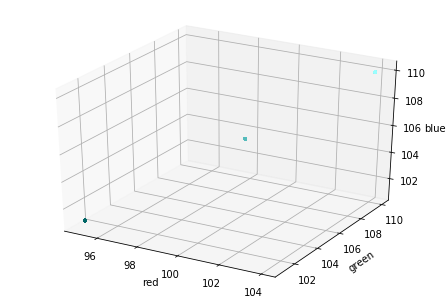

In [46]:
np.set_printoptions(threshold=np.inf)

flowersm_32_kmeans_output_test = kens_k_means_image_test_2(
                                X=flowersm_original_3d_array,
                                k=4,
                                d=3,
                                output_path=os.path.join(working_directory, 'flowersm_rgb_32_colors_test.ppm'),
                                max_iterations=100)

rgb_colorspace_3d(rgb_3d_array=(flowersm_32_kmeans_output_test) ,title='RGB 32 color space for flowersm test') 


In [29]:

def kens_k_means_image(X, k, d, output_path):
    start = time.time() #timer
    #imput a 3d array
    #centroids = np.random.randint(low=np.amin(X),
     #                               high=np.amax(X),
     #                               size=(k,d))
    
    # I need to input a 2d array of each pixel rgb values:
    X_2d = X.reshape(-1,d)

    k_func = KMeans(n_clusters=k).fit(X_2d)

    # assigns every pixel the color of the centroid it is assigned to
    X_2d_kmeans=k_func.cluster_centers_[k_func.labels_ ]


    #turn the 2d array into the 3d array that defined the image
    X_3d_kmeans = np.reshape(X_2d_kmeans, (X.shape))

    # remember to keep track of data types..... 
    output_array = np.asarray((X_3d_kmeans), dtype=np.uint8)

    output_image = pil.fromarray(output_array)
    #output_image.show()
    output_image.save(fp=output_path)
    end = time.time()
    print ('time to complete:', end - start, 'seconds')


    #while True:
        # 2a. Assign labels based on closest center
        #labels = np.amin(distance.euclidean(X, centroids))
        
        # 2b. Find new centers from means of points
        #new_centers = np.array([X[labels == i].mean(0)
                                #for i in range(centroids)])
        
        # 2c. Check for convergence
        #if np.all(centroids == new_centers):
            #break
        #centers = new_centers
    return output_array
    

In [30]:
flowersm_256_kmeans_output = kens_k_means_image(
                                X=flowersm_original_3d_array,
                                k=256,
                                d=3,
                                output_path=os.path.join(working_directory, 'flowersm_rgb_256_colors.ppm') )

flowersm_128_kmeans_output = kens_k_means_image(
                                X=flowersm_original_3d_array,
                                k=128,
                                d=3,
                                output_path=os.path.join(working_directory, 'flowersm_rgb_128_colors.ppm') )

flowersm_64_kmeans_output = kens_k_means_image(
                                X=flowersm_original_3d_array,
                                k=64,
                                d=3,
                                output_path=os.path.join(working_directory, 'flowersm_rgb_64_colors.ppm') )
flowersm_32_kmeans_output = kens_k_means_image(
                                X=flowersm_original_3d_array,
                                k=32,
                                d=3,
                                output_path=os.path.join(working_directory, 'flowersm_rgb_32_colors.ppm') )
flowersm_16_kmeans_output = kens_k_means_image(
                                X=flowersm_original_3d_array,
                                k=16,
                                d=3,
                                output_path=os.path.join(working_directory, 'flowersm_rgb_16_colors.ppm') )
flowersm_8_kmeans_output = kens_k_means_image(
                                X=flowersm_original_3d_array,
                                k=8,
                                d=3,
                                output_path=os.path.join(working_directory, 'flowersm_rgb_8_colors.ppm') )
flowersm_4_kmeans_output = kens_k_means_image(
                                X=flowersm_original_3d_array,
                                k=4,
                                d=3,
                                output_path=os.path.join(working_directory, 'flowersm_rgb_4_colors.ppm') )
flowersm_2_kmeans_output = kens_k_means_image(
                                X=flowersm_original_3d_array,
                                k=2,
                                d=3,
                                output_path=os.path.join(working_directory, 'flowersm_rgb_2_colors.ppm') )
flowersm_1_kmeans_output = kens_k_means_image(
                                X=flowersm_original_3d_array,
                                k=1,
                                d=3,
                                output_path=os.path.join(working_directory, 'flowersm_rgb_1_colors.ppm') )




time to complete: 14.455856084823608 seconds


time to complete: 8.520166158676147 seconds


time to complete: 5.148934364318848 seconds


time to complete: 2.7246127128601074 seconds


time to complete: 1.6135454177856445 seconds


time to complete: 0.3223094940185547 seconds
time to complete: 0.15614867210388184 seconds


time to complete: 0.06507563591003418 seconds
time to complete: 0.030018329620361328 seconds


In [12]:

#kmeans = KMeans(n_clusters=256)
#kmeans.fit(flowersm_2d_rgb_array)
#out_kmeans = kmeans.predict(flowersm_2d_rgb_array)


flowersm_original_image_skimport = io.imread((os.path.join(working_directory, 'flowersm.ppm')))     

flowersm_original_2d_array_skimport = (flowersm_original_image_skimport/255.0).reshape(-1,3)
 
 
flowersm_2d_rgb_percent = (flowersm_original_3d_array/255.0).reshape(-1,3)

#need to input a 2d array of each pixel rgb values:



# The following assigns every pixel the color of the centroid it is assigned to
k_colors = KMeans(n_clusters=64).fit(flowersm_original_2d_array_skimport)
new_flowersm_256=k_colors.cluster_centers_[k_colors.labels_ ]
#clusters = np.asarray(k_colors.cluster_centers_,dtype=np.uint8) 

#labels = np.asarray(k_colors.labels_,dtype=np.uint8 ) 

#new_flowersm_256=clusters([labels])

print(new_flowersm_256.dtype, new_flowersm_256.size, new_flowersm_256)

#img128=np.reshape(img128, (img.shape))
new_flowersm_256_3d_array = np.reshape(new_flowersm_256, (120,120,3))

 
#output = Image.fromarray(new_flowersm_256)

#output_name = (os.path.join(working_directory, 'flowersm_rgb_256_colors') + '.png')

#rounds to the closest integrer
#new_flowersm_256_3d_array_2 = np.rint(new_flowersm_256_3d_array)
#*255.0
# , dtype=np.uint8
#astype(uint8) 

#print(new_flowersm_256_3d_array_2.dtype, new_flowersm_256_3d_array_2)

#new_flowersm_256_3d_array_2 = new_flowersm_256_3d_array.astype('uint8')

#np.rint( 
new_flowersm_256_3d_array_2 = np.reshape(new_flowersm_256, (flowersm_original_3d_array.shape))
#np.asarray(new_flowersm_256_3d_array_2)

test_1 = np.asarray((new_flowersm_256_3d_array_2*255), dtype=np.uint8)
print(test_1)

new_flowersm_256_image = pil.fromarray(test_1)
new_flowersm_256_image.show()
new_flowersm_256_image.save(fp=os.path.join(working_directory, 'flowersm_rgb_64_colors.ppm'))
#format='ppm'

#output.save(output_name)
#output.save((os.path.join(working_directory, 'flowersm at 256 colors.png') + '.png'))

#Image.show(output)
#Image.save(output)

#image.imsave(os.path.join(working_directory, 'flowersm_rgb_256_colors_matplotlib.tif')
             #,new_flowersm_256_3d_array)

#print(img_r)

#centroids_test, labels_test = kens_k_means(X=flowersm_original_3d_array,k=256,d=3)

#print(centroids_test)


float64 43200 [[0.38532315 0.4191612  0.39686453]
 [0.41147565 0.44984343 0.43414752]
 [0.41147565 0.44984343 0.43414752]
 ...
 [0.36233906 0.39108103 0.3666632 ]
 [0.34224265 0.36820466 0.33944853]
 [0.32263962 0.34580122 0.31588371]]
[[[ 98 106 101]
  [104 114 110]
  [104 114 110]
  ...
  [ 79  75  66]
  [ 79  75  66]
  [ 73  72  61]]

 [[ 98 106 101]
  [ 98 106 101]
  [ 98 106 101]
  ...
  [ 73  72  61]
  [ 73  72  61]
  [ 73  72  61]]

 [[ 98 106 101]
  [ 92  99  93]
  [ 92  99  93]
  ...
  [ 75  78  69]
  [ 73  72  61]
  [ 73  72  61]]

 ...

 [[ 73  72  61]
  [ 79  75  66]
  [ 75  78  69]
  ...
  [ 92  99  93]
  [ 87  93  86]
  [ 87  93  86]]

 [[ 75  78  69]
  [ 79  75  66]
  [ 79  75  66]
  ...
  [ 92  99  93]
  [ 87  93  86]
  [ 82  88  80]]

 [[ 75  78  69]
  [ 79  75  66]
  [ 79  75  66]
  ...
  [ 92  99  93]
  [ 87  93  86]
  [ 82  88  80]]]


In [13]:
RGB_colorspace_3d(rgb_3d_array=(test_1).astype(int) ,title='RGB 256 color space for flowersm') 

X, count =np.unique(new_flowersm_256_3d_array.reshape(-1,3),axis=0,return_counts=True)
print(X.shape)

NameError: name 'RGB_colorspace_3d' is not defined

In [14]:
def least_squared_error(X1,X2):
    
    X1r= (X1).reshape(-1,3)
    X2r= (X2).reshape(-1,3)
    error = np.mean(np.power(np.subtract(X1r, X2r),2),axis=1)
    #Xt = np.subtract(X2r,X1r)
    #error = np.linalg.norm(x=Xt, axis=1)
    print(error)
    mse = np.mean(error)  
    PSNR = 20 * np.log10(255/(mse**0.5))
    print('mean squared error:',mse)
    print ('peak-signal-to-noise-ratio',PSNR)
    return mse, PSNR
    

In [15]:
def mean_squared_error_plot(X1,X2, title):
    mse, PSNR = least_squared_error(X1,X2)
    
    X1_2d =(X1.reshape(-1,3))
    X2_2d =(X2.reshape(-1,3))
    
    
    plt.subplots()
    plt.grid()
    plt.xlim(0,255)
    plt.ylim(0,255)
    plt.xlabel('original')
    plt.ylabel('k-means')

    plt.scatter(x=X1_2d[:,0], y=X2_2d[:,0], c='red', label='red', marker='^',  s=3)
    plt.scatter(x=X1_2d[:,1], y=X2_2d[:,1], c='green', label='green', marker='^',  s=3)
    plt.scatter(x=X1_2d[:,2], y=X2_2d[:,2], c='blue', label='blue', marker='^',  s=3)

    #plt.scatter(x=X1.reshape(-1,3), y=X2.reshape(-1,3), c='blue', label='pixels', marker='^',  s=3)
    #plt.scatter(x=X1.reshape(-1,3), y=X2.reshape(-1,3), c='blue', label='pixels', marker='^',  s=3)

    
    plt.text(x=100, y=25, s=('mean squared error %.3f'% mse) )
    plt.text(x=100, y=10, s=('peak-signal-to-noise-ratio %.3f' %PSNR) )

    plt.title(title)
    plt.legend()
    plt.savefig((os.path.join(working_directory, title) + '.png'), dpi=600)
    plt.show()
    return 
    

[6.         7.         7.         ... 9.         8.33333333 9.        ]
mean squared error: 5.656851851851851
peak-signal-to-noise-ratio 40.60505555782396


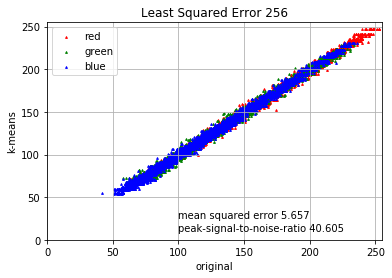

[ 6.33333333  4.          4.         ...  9.         17.
 16.33333333]
mean squared error: 9.19
peak-signal-to-noise-ratio 38.497648494817994


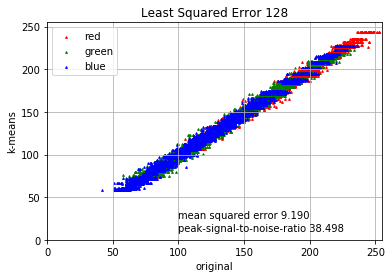

[ 9.         11.66666667 11.66666667 ... 22.         24.66666667
 19.66666667]
mean squared error: 14.583402777777778
peak-signal-to-noise-ratio 36.492214901652034


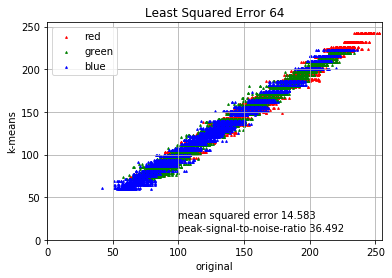

[29.66666667  5.66666667  5.66666667 ... 27.33333333 18.
 11.66666667]
mean squared error: 22.91513888888889
peak-signal-to-noise-ratio 34.52957867015875


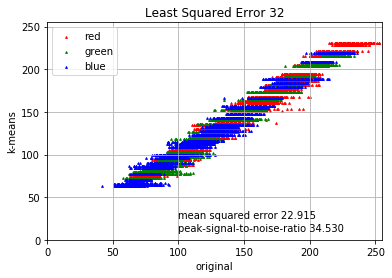

[47.         51.66666667 51.66666667 ... 28.33333333 74.
 23.        ]
mean squared error: 37.107870370370364
peak-signal-to-noise-ratio 32.43614330069002


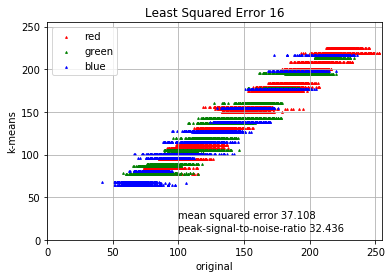

[ 27.          61.66666667  61.66666667 ... 110.33333333 102.33333333
  34.66666667]
mean squared error: 60.48953703703703
peak-signal-to-noise-ratio 30.31400100265826


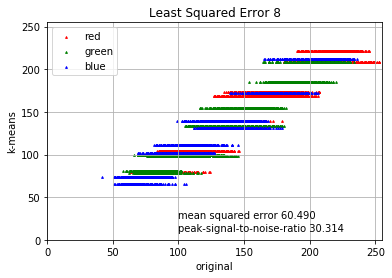

[181.66666667 126.         126.         ...  78.33333333  86.33333333
  29.33333333]
mean squared error: 81.24601851851853
peak-signal-to-noise-ratio 29.032782734053658


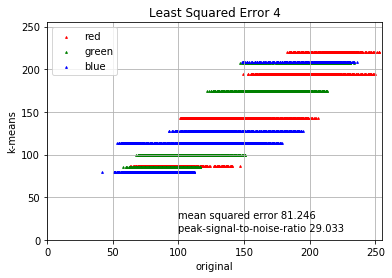

[ 98.          98.          98.         ... 120.66666667 136.66666667
  33.66666667]
mean squared error: 97.40094907407408
peak-signal-to-noise-ratio 28.245171722066956


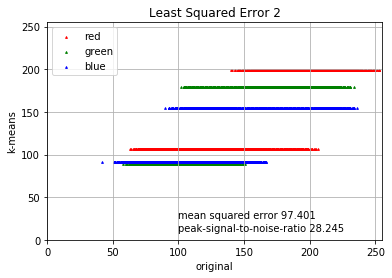

In [16]:
mean_squared_error_plot(flowersm_original_3d_array,
                        flowersm_256_kmeans_output,
                        title='Least Squared Error 256')

mean_squared_error_plot(flowersm_original_3d_array,
                        flowersm_128_kmeans_output,
                        title='Least Squared Error 128')

mean_squared_error_plot(flowersm_original_3d_array,
                        flowersm_64_kmeans_output,
                        title='Least Squared Error 64')

mean_squared_error_plot(flowersm_original_3d_array,
                        flowersm_32_kmeans_output,
                        title='Least Squared Error 32')

mean_squared_error_plot(flowersm_original_3d_array,
                        flowersm_16_kmeans_output,
                        title='Least Squared Error 16')

mean_squared_error_plot(flowersm_original_3d_array,
                        flowersm_8_kmeans_output,
                        title='Least Squared Error 8')

mean_squared_error_plot(flowersm_original_3d_array,
                        flowersm_4_kmeans_output,
                        title='Least Squared Error 4')

mean_squared_error_plot(flowersm_original_3d_array,
                        flowersm_2_kmeans_output,
                        title='Least Squared Error 2')







[6.         7.         7.         ... 9.         8.33333333 9.        ]
mean squared error: 5.656851851851851
peak-signal-to-noise-ratio 40.60505555782396


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xca441f95f8>)

(0, 255)

(0, 255)

NameError: name 'X1_2d' is not defined

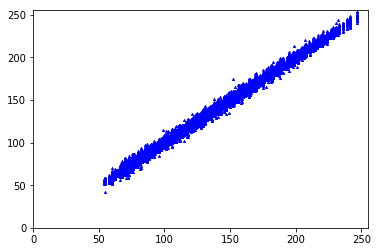

In [17]:
#new_flowersm_256_2d_array = np.asarray((flowersm_256_kmeans_output), dtype=np.uint8)

test_least_squared=least_squared_error(flowersm_original_3d_array,flowersm_256_kmeans_output)

#print(test_least_squared)
#pd.DataFrame(flowersm_2d_rgb_array)
#pd.DataFrame(new_flowersm_256_2d_array)
#print(new_flowersm_256_2d_array.shape[0])

plt.subplots()
plt.xlim(0,255)
plt.ylim(0,255)
plt.scatter(x=flowersm_256_kmeans_output.reshape(-1,3),y=flowersm_original_3d_array.reshape(-1,3) , c='blue', label='Error', marker='^',  s=4)
plt.scatter(x=X1_2d[:,0], y=X2_2d[:,0], c='red', label='red', marker='^',  s=3)
plt.scatter(x=X1_2d[:,1], y=X2_2d[:,1], c='green', label='green', marker='^',  s=3)
plt.scatter(x=X1_2d[:,2], y=X2_2d[:,2], c='blue', label='blue', marker='^',  s=3)
plt.grid()
plt.text(x=100, y=65, s=('mean squared error:', test_least_squared) )
plt.title('Least Squared Error 64')
plt.legend()
plt.savefig((os.path.join(working_directory, 'Least Squared Error 64') + '.png'), dpi=600)

plt.show()

In [18]:

def mean_squared_error_hist(X1,X2, title):
    mse, PSNR = least_squared_error(X1,X2)
    
    #X1_2d =(X1.reshape(-1,3))
    X2_2d =(X2.reshape(-1,3))
    fig , ax = plt.subplots()

    n_bins = 50

    plt.grid()
    plt.xlim(0,255)
    plt.xlabel('rgb')
    plt.ylabel('count')
    ax.hist(X2_2d, n_bins, histtype='stepfilled', alpha=0.3, label=('R', 'G','B'), color=('red','green','blue'))

    #plt.scatter(x=X1_2d[:,0], y=X2_2d[:,0], c='red', label='red', marker='^',  s=3)
    #plt.scatter(x=X1_2d[:,1], y=X2_2d[:,1], c='green', label='green', marker='^',  s=3)
    #plt.scatter(x=X1_2d[:,2], y=X2_2d[:,2], c='blue', label='blue', marker='^',  s=3)

    #plt.scatter(x=X1.reshape(-1,3), y=X2.reshape(-1,3), c='blue', label='pixels', marker='^',  s=3)
    #plt.scatter(x=X1.reshape(-1,3), y=X2.reshape(-1,3), c='blue', label='pixels', marker='^',  s=3)

    
    #plt.text(x=100, y=25, s=('mean squared error %.3f'% mse) )
    #plt.text(x=100, y=10, s=('peak-signal-to-noise-ratio %.3f' %PSNR) )

    plt.title(title)
    plt.legend()
    plt.savefig((os.path.join(working_directory, title) + '.png'), dpi=600)
    plt.show()
    return 


[6.         7.         7.         ... 9.         8.33333333 9.        ]
mean squared error: 5.656851851851851
peak-signal-to-noise-ratio 40.60505555782396


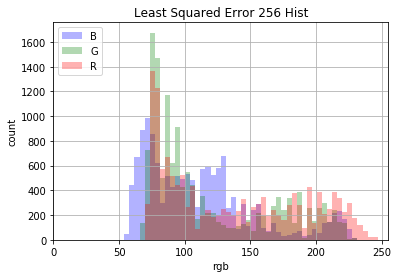

[ 6.33333333  4.          4.         ...  9.         17.
 16.33333333]
mean squared error: 9.19
peak-signal-to-noise-ratio 38.497648494817994


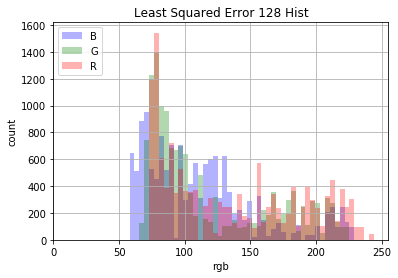

[ 9.         11.66666667 11.66666667 ... 22.         24.66666667
 19.66666667]
mean squared error: 14.583402777777778
peak-signal-to-noise-ratio 36.492214901652034


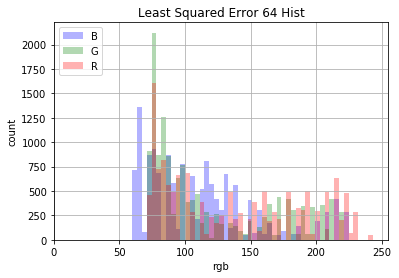

[29.66666667  5.66666667  5.66666667 ... 27.33333333 18.
 11.66666667]
mean squared error: 22.91513888888889
peak-signal-to-noise-ratio 34.52957867015875


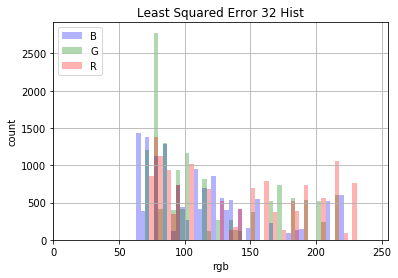

[47.         51.66666667 51.66666667 ... 28.33333333 74.
 23.        ]
mean squared error: 37.107870370370364
peak-signal-to-noise-ratio 32.43614330069002


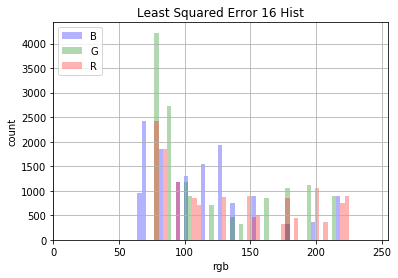

[ 27.          61.66666667  61.66666667 ... 110.33333333 102.33333333
  34.66666667]
mean squared error: 60.48953703703703
peak-signal-to-noise-ratio 30.31400100265826


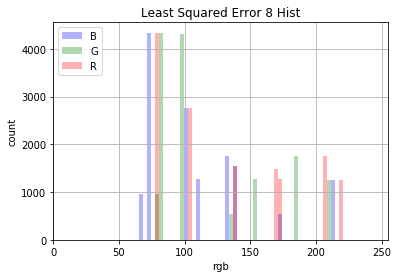

[181.66666667 126.         126.         ...  78.33333333  86.33333333
  29.33333333]
mean squared error: 81.24601851851853
peak-signal-to-noise-ratio 29.032782734053658


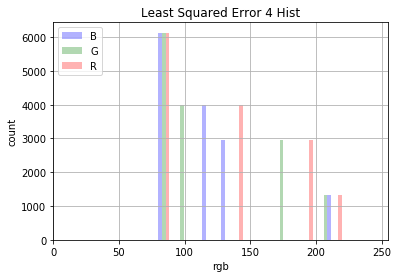

[ 98.          98.          98.         ... 120.66666667 136.66666667
  33.66666667]
mean squared error: 97.40094907407408
peak-signal-to-noise-ratio 28.245171722066956


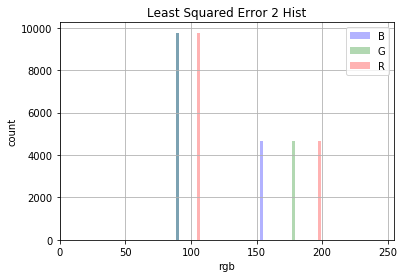

In [19]:
mean_squared_error_hist(flowersm_original_3d_array,
                        flowersm_256_kmeans_output,
                        title='Least Squared Error 256 Hist')

mean_squared_error_hist(flowersm_original_3d_array,
                        flowersm_128_kmeans_output,
                        title='Least Squared Error 128 Hist')

mean_squared_error_hist(flowersm_original_3d_array,
                        flowersm_64_kmeans_output,
                        title='Least Squared Error 64 Hist')

mean_squared_error_hist(flowersm_original_3d_array,
                        flowersm_32_kmeans_output,
                        title='Least Squared Error 32 Hist')

mean_squared_error_hist(flowersm_original_3d_array,
                        flowersm_16_kmeans_output,
                        title='Least Squared Error 16 Hist')

mean_squared_error_hist(flowersm_original_3d_array,
                        flowersm_8_kmeans_output,
                        title='Least Squared Error 8 Hist')

mean_squared_error_hist(flowersm_original_3d_array,
                        flowersm_4_kmeans_output,
                        title='Least Squared Error 4 Hist')

mean_squared_error_hist(flowersm_original_3d_array,
                        flowersm_2_kmeans_output,
                        title='Least Squared Error 2 Hist')




'\n=============================================\nA demo of the mean-shift clustering algorithm\n=============================================\n\nReference:\n\nDorin Comaniciu and Peter Meer, "Mean Shift: A robust approach toward\nfeature space analysis". IEEE Transactions on Pattern Analysis and\nMachine Intelligence. 2002. pp. 603-619.\n\n'

Automatically created module for IPython interactive environment


MeanShift(bandwidth=30.73800815525104, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=None, seeds=None)

number of estimated clusters : 5


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Estimated number of clusters: 5')

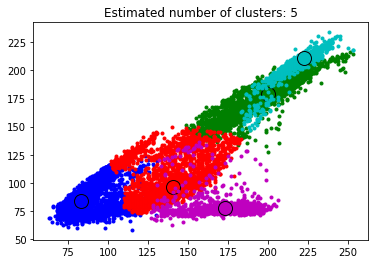

In [20]:
"""
=============================================
A demo of the mean-shift clustering algorithm
=============================================

Reference:

Dorin Comaniciu and Peter Meer, "Mean Shift: A robust approach toward
feature space analysis". IEEE Transactions on Pattern Analysis and
Machine Intelligence. 2002. pp. 603-619.

"""
print(__doc__)

#from colormath.color_objects import sRGBColor, LuvColor
#from colormath.color_conversions import convert_color

import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
#from sklearn.datasets.samples_generator import make_blobs

#flowersm_2d_array = flowersm_original_3d_array.reshape(-1,3)
#rgb_array = sRGBColor(rgb_r=flowersm_2d_array[:,0],
                     # rgb_g=flowersm_2d_array[:,1],
                #      rgb_b=flowersm_2d_array[:,2],)



#luv_original_3d = convert_color(rgb_array,LuvColor)

# #############################################################################
# Generate sample data
#centers = [[1, 1], [-1, -1], [1, -1]]


#X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(flowersm_original_3d_array.reshape(-1,3), quantile=0.1)

ms = MeanShift(bin_seeding=True,bandwidth=bandwidth)
ms.fit(flowersm_original_3d_array.reshape(-1,3))
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle
#fig = plt.figure(1)
#ax = Axes3D(fig)
plt.figure(1)
plt.clf()
colors_means = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors_means):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(flowersm_original_3d_array.reshape(-1,3)[my_members, 0], flowersm_original_3d_array.reshape(-1,3)[my_members, 1],col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.savefig((os.path.join(working_directory, 'mean_shift_sklearn .02') + '.png'), dpi=600)
plt.show()


In [21]:

def rgb_colorspace_3d_clusters(rgb_original, rgb_3d_array, title):
    fig = plt.figure()
    ax = Axes3D(fig)
    pixel_colors = rgb_3d_array.reshape((np.shape(rgb_3d_array)[0] * np.shape(rgb_3d_array)[1], 3))
    norm = colors.Normalize(vmin=-1., vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()

    ax.scatter(xs=rgb_original[:, :, 0],
               ys=rgb_original[:, :, 1],
               zs=rgb_original[:, :, 2],
               facecolors=pixel_colors,
               marker=".")
    fig.title = title

    ax.set_xlabel('red')
    ax.set_ylabel('green')
    ax.set_zlabel('blue')

    fig.savefig((os.path.join(working_directory, title) + '.png'), dpi=1200)
    plt.show()





[[ 82.96012329  83.64842997  77.50799461]
 [199.76805897 178.62309582 125.94791155]
 [140.53244006  96.6438646  141.89562764]
 [222.36589698 210.77708703 214.40230906]
 [173.09669811  77.57193396  65.14150943]]
[[82.96012329 83.64842997 77.50799461]
 [82.96012329 83.64842997 77.50799461]
 [82.96012329 83.64842997 77.50799461]
 ...
 [82.96012329 83.64842997 77.50799461]
 [82.96012329 83.64842997 77.50799461]
 [82.96012329 83.64842997 77.50799461]]


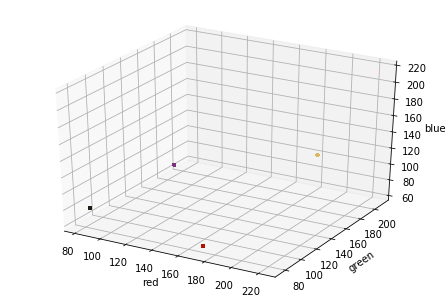

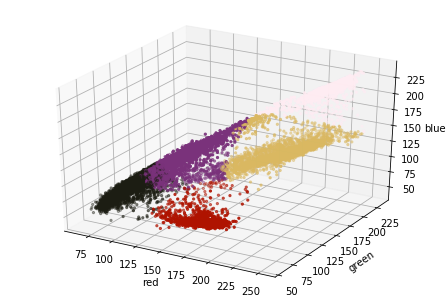

In [22]:
X_2d_mean_shift=cluster_centers[labels]
print(cluster_centers)
print(X_2d_mean_shift)

means_shift_3d = np.asarray((X_2d_mean_shift.reshape(120,120,3)), dtype=np.uint8)
means_output = pil.fromarray(means_shift_3d)
means_output.show()
means_output.save(fp=os.path.join(working_directory, 'flowersm_mean_shift_colors(quantile=0.02).ppm'))
rgb_colorspace_3d(rgb_3d_array=means_shift_3d ,title='RGB_mean_shift_colors_flowersm(quantile=0.02)') 
rgb_colorspace_3d_clusters(rgb_original=flowersm_original_3d_array, rgb_3d_array=means_shift_3d, title='RGB_mean_shift_colors_regions_flowersm(quantile=0.02)') 
